In [1]:
from minermeta import MinerMeta


In [2]:
m = MinerMeta()
df = m.compile_lc_data(read_csv=True)


In [3]:
df.index.min()

'2022-04-29 20:00:00'

In [4]:
df.index.max()

'2022-05-06 20:00:00'

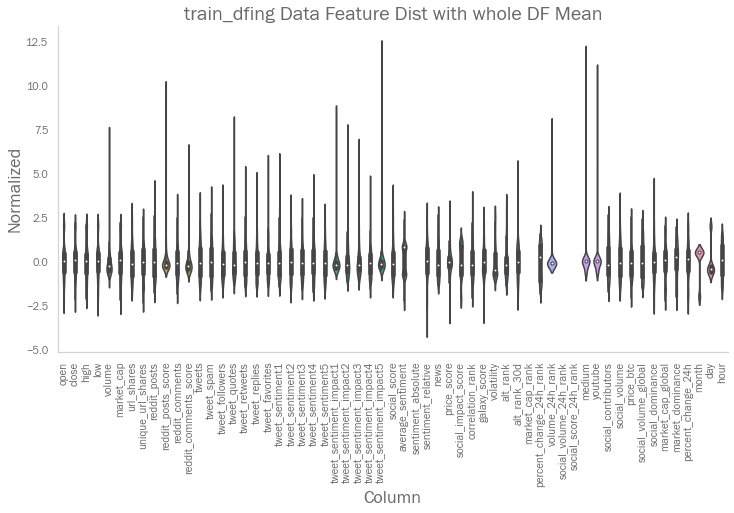

In [5]:
ml_ds = m.ttsplit_norm(df, feature_plot=True)
